**SMS SPAM DETECTION**

Loading libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup
import re
from typing import List
import math
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

DATA SCRAPING

In [ ]:
# soup = BeautifulSoup(open("./reddit.html", "r", encoding="utf-8").read(), "lxml")
# divs = soup.find_all(class_="_1poyrkZ7g36PawDueRza-J _11R7M_VOgKO1RJyRSRErT3 _1Qs6zz6oqdrQbR7yE_ntfY")
# tests = [""]

# for div in divs:
#     h3 = BeautifulSoup(str(div), "lxml").select_one("div>div:nth-of-type(2)>div:nth-of-type(2)>a h3")
#     if h3:
#         tests.append("spam, \""+h3.text+"\"")

# open("./spam.csv", "a", encoding="utf-8").write("\n".join(tests))
# print("The tests file has been saved")


**Loading the data set**

In [ ]:
# data_set = pd.read_csv('spam.csv',encoding='utf-8',on_bad_lines="warn")
data_set = pd.read_csv('spam.csv',encoding='latin-1')

**Viewing our data set**

In [ ]:
data_set.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


**DATA CLEANING**

Describing our data set

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We can see that columns

**Dropping unnecessary columns** :-

> We can see that columns **'Unnamed: 2', 'Unnamed: 3','Unnamed: 4'** don't have sufficient data to give us some meaning insights or help building model. Hence we can safely grop these columns.




In [ ]:
data_set.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1,inplace = True)

In [ ]:
data_set.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Checking for null values**

In [ ]:
data_set.isnull().sum()

v1    0
v2    0
dtype: int64

From this we can say that there are no null values.

**Checking for unique values in our data set**

In [ ]:
data_set['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
len(data_set['v1'].unique())

2

We can clearly state that column v1 has only two unique values 'ham' and 'spam' . From this we can say that v1 is our target column with ham indicating not a spam meassage .

In [ ]:
len(data_set['v2'].unique())

5169

**Encoding our target column**


> Ham in encoded to 0 , where as spam is encoded to 1.





In [ ]:
v1 = []
for i in np.array(data_set['v1']) :
  if i == 'ham' :
    v1.append(0)
  else :
    v1.append(1)

In [ ]:
data_set['v1'] = v1

In [ ]:
data_set.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


Renaming our columns ( Giving them a more descriptive names )

In [ ]:
data_set.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [ ]:
data_set.head(10)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


**Looking for duplicate columns**

In [ ]:
data_set.duplicated().sum()

403

From the above code we found that there are 403 total duplicate rows

Dropping the duplicate rows and keeping the first occurance

In [ ]:
data_set = data_set.drop_duplicates(keep='first')

In [ ]:
data_set.duplicated().sum()

0

In [ ]:
data_set.shape

(5169, 2)

**Extensive data analysis**

In [ ]:
data_set.groupby('target').count()

,message
target,
0,4516
1,653


From the above code we can observe that our data set is not balanced . Hence the count of spam messages is very less compared to ham messages.

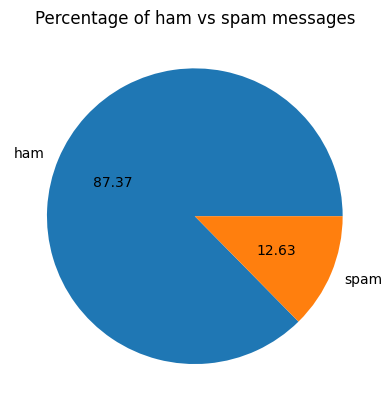

In [ ]:
plt.pie(data_set['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.title('Percentage of ham vs spam messages')
plt.show()

Counting the number of characters in a sentence

In [ ]:
data_set['num_characters'] = data_set['message'].apply(len)

In [ ]:
data_set.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Class for transforming our messages


> The following class will help us to transorm our text messages by applying various nlp techniques ,so that it can be used to feed and train our model .



In [ ]:
stop_words = pd.read_csv("stop_words.txt", sep=" ", header=None)
stop_words = np.array(stop_words[0])

In [ ]:
def word_tokenizer(string: str) -> List[str]:
    tokens = re.split('([-!@#$%^&*()_=+|\[\]{};:.?/>,`</]|\s)', string)
    nrmlz_tokens = []
    nrmlz_cnct_tokens = []
    for token in tokens:
        if ((not len(token) == 0) and (not re.match('\s', token))):
            nrmlz_tokens.append(token.lower())
    for i in range(0, len(nrmlz_tokens)):
        if ((i > 0)
            and ((re.match('^[a-z]$', nrmlz_cnct_tokens[-1])
                    and re.match('^\.$', nrmlz_tokens[i]))
            or (re.match('^[a-z]\.$', nrmlz_cnct_tokens[-1])
                    and re.match('^\w+$', nrmlz_tokens[i])))):
            nrmlz_cnct_tokens.append(nrmlz_cnct_tokens[-1] + nrmlz_tokens[i])
            nrmlz_cnct_tokens.pop(-2)
        else:
            nrmlz_cnct_tokens.append(nrmlz_tokens[i])
    return nrmlz_cnct_tokens

def sent_tokenizer(string: str) -> List[str]:
    sent_tokens = re.split('((?<=\w)[.?!]{1,2})\s+', string=string)
    nrmlz_tokens = []
    for i in range(len(sent_tokens)):
        if (re.match('[.?!]{1,2}',sent_tokens[i])) and i>0:
            nrmlz_tokens.append(nrmlz_tokens[-1]+sent_tokens[i])
            nrmlz_tokens.pop(-2)
        else:
            nrmlz_tokens.append(sent_tokens[i])
    return nrmlz_tokens

Counting the number of words in a senetence

In [ ]:
data_set['num_words'] = data_set['message'].apply(lambda x: len(word_tokenizer(x)))

Counting the number of senetences

In [ ]:
data_set['num_sentences'] =  data_set['message'].apply(lambda x: len(sent_tokenizer(x)))

In [ ]:
data_set.head(10)

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,29,2
1,0,Ok lar... Joking wif u oni...,29,12,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,35,2
3,0,U dun say so early hor... U c already then say...,49,17,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,38,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


Describing ham messages

In [ ]:
data_set[data_set['target'] == 0][['num_characters'	,'num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.620239,1.717006
std,56.358207,13.902076,1.143360
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,23.000000,2.000000
max,910.000000,222.000000,12.000000


Looking for outliers

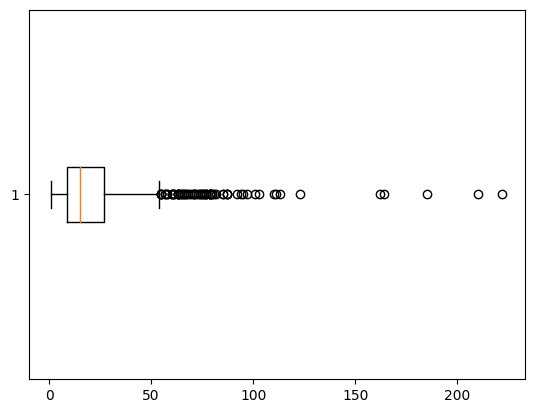

In [ ]:
plt.boxplot(np.array(data_set['num_words']),vert=False)
plt.show()

We can clearly se that there are too many ouliers in the data set baset on the count of words

>Using the formula 3*IQR we found that words with length greater than 64 are ouliers



In [ ]:
maX_words_permitted = 64
data_set[data_set['num_words'] > 64]['message'].count()

52

In [ ]:
data_set = data_set.drop(data_set[data_set['num_words'] > 64].index)

Describing spam messages

In [ ]:
data_set[data_set['target'] == 1][['num_characters'	,'num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,30.315467,2.998469
std,30.137753,7.850893,1.550281
min,13.000000,2.000000,1.000000
25%,132.000000,27.000000,2.000000
50%,149.000000,31.000000,3.000000
75%,157.000000,35.000000,4.000000
max,224.000000,55.000000,8.000000


Plotting number of characters in ham and spam messages

<Axes: xlabel='num_characters', ylabel='Count'>

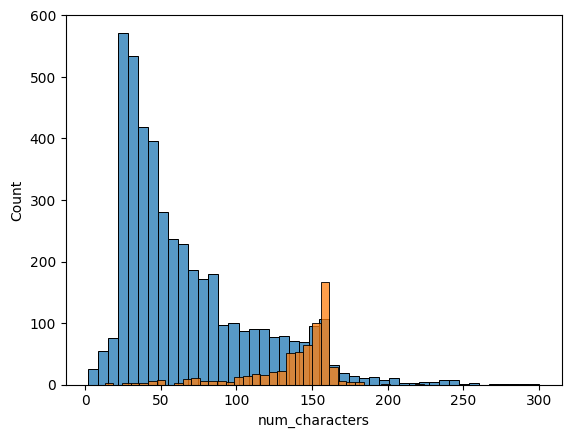

In [ ]:
sns.histplot(data_set[data_set['target']==0]['num_characters'])
sns.histplot(data_set[data_set['target']==1]['num_characters'])


From the above graph we can conclude that , on an average there is more use of characters in spam messages then compared to ham messages


<Axes: xlabel='num_words', ylabel='Count'>

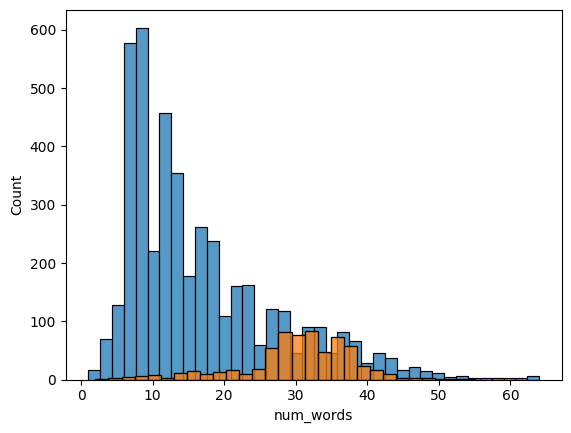

In [ ]:
sns.histplot(data_set[data_set['target']==0]['num_words'])
sns.histplot(data_set[data_set['target']==1]['num_words'])

From the above graph we can conclude that , on an average there is more use of words in spam messages then compared to ham messages

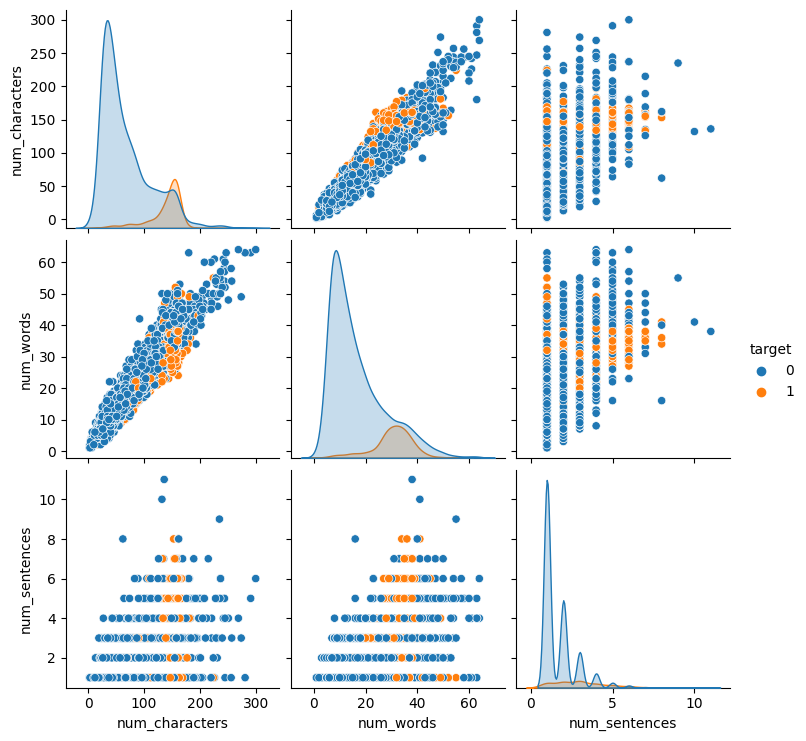

In [ ]:
sns.pairplot(data_set,hue='target')

Text(0.5, 1.0, 'number of characters vs number of words')

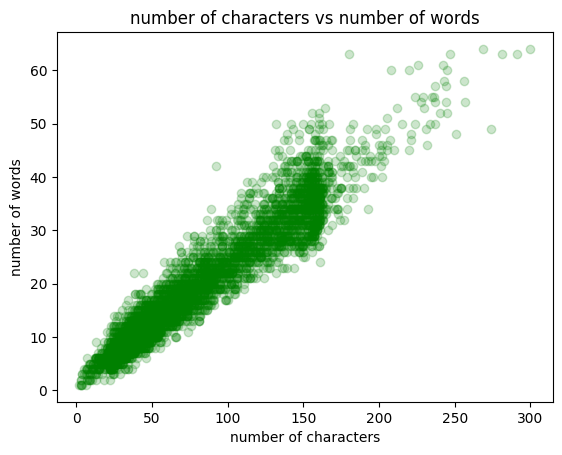

In [ ]:
plt.scatter(np.array(data_set['num_characters']),np.array(data_set['num_words']),color='green',alpha=0.2)
plt.xlabel('number of characters')
plt.ylabel('number of words')
plt.title('number of characters vs number of words')

Correlation analysis of attributes

<ipython-input-48-a7a1e5afaa1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.corr(),annot=True)


<Axes: >

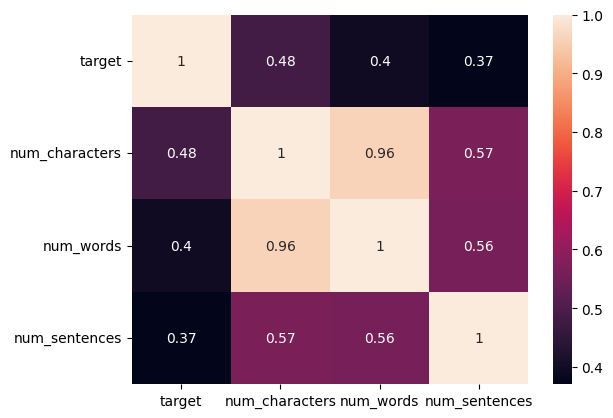

In [ ]:
sns.heatmap(data_set.corr(),annot=True)

From the above graph we can say that number of words and number of characters are strongly correlated

Data preprocessing

Transforming our messages

In [ ]:
def __iscons__(letter: str) -> bool:
    # Check whether is consonant or not
    if letter == 'a' or letter == 'e' or letter == 'i' or letter == 'o' or letter == 'u':
        return False
    else:
        return True

def __isconsonant__(word: str, i: int) -> bool:
    # function that returns true only if the letter at i th position in the argument 'word' is a consonant.
    # But if the letter is 'y' and the letter at i-1 th positionis also a consonant, then it returns false.
    letter = word[i]
    if __iscons__(letter):
        if letter == 'y' and __iscons__(word[i-1]):
            return False
        else:
            return True
    else:
        return False

def __isvowel__(word: str, i: int) -> bool:
    # function that returns true if the letter at i th position in the argument 'word' is a vowel
    return not (__isconsonant__(word, i))

# *S
def __endsWith__(stem: str, letter: str) -> bool:
    # Fuction that check that word ends with s
    # returns true if the word 'stem' ends with 'letter'
    return bool(stem.endswith(letter))

# *v*
def __containsVowel__(stem: str) -> bool:
    # Function that checks letter has vowels
    # returns true if the word 'stem' contains a vowel
    for i in stem:
        if not __iscons__(i):
            return True
    return False

# *d
def __doubleConsonant__(stem: str) -> bool:
    # returns true if the word 'stem' ends with 2 consonants
    if len(stem) >= 2:
        if __isconsonant__(stem, -1) and __isconsonant__(stem, -2):
            return True
        else:
            return False
    else:
        return False

def __getform__(word: str) -> str:
    """
        This function takes a word as an input,
        and checks for vowel and consonant sequences in that word.
        vowel sequence is denoted by V and consonant sequences by C.
        For example, the word 'balloon' can be divived into following sequences:
        'b' : C
        'a' : V
        'll': C
        'oo': V
        'n' : C
        So form = [C,V,C,V,C] and formstr = CVCVC
    """
    form = []
    formStr = ''
    for i in range(len(word)):
        if __isconsonant__(word, i):
            if i != 0:
                prev = form[-1]
                if prev != 'C':
                    form.append('C')
            else:
                form.append('C')
        else:
            if i != 0:
                prev = form[-1]
                if prev != 'V':
                    form.append('V')
            else:
                form.append('V')
    for j in form:
        formStr += j
    return formStr

def __getm__(word: str) -> int:
    # returns value of M which is equal to number of 'VC' in formstr
    # So in above example of word 'balloon', we have 2 'VC'
    form = __getform__(word)
    m = form.count('VC')
    return m

# *o
def __cvc__(word: str) -> bool:
    """
        returns true if the last 3 letters of the word are of the following pattern:
        consonant,vowel,consonant but if the last word is either 'w','x' or 'y', it returns false
    """
    if len(word) >= 3:
        f = -3
        s = -2
        t = -1
        third = word[t]
        if __isconsonant__(word, f) and __isvowel__(word, s) and __isconsonant__(word, t):
            if third != 'w' and third != 'x' and third != 'y':
                return True
            else:
                return False
        else:
            return False
    else:
        return False

def __replace__(orig: str, rem: str, rep: str) -> str:
    # this function checks if string 'orig' ends with 'rem' and replaces 'rem' by the substring 'rep'.
    # The resulting string 'replaced' is returned.
    result = orig.rfind(rem)
    base = orig[:result]
    replaced = base + rep
    return replaced

def __replacem0__(orig: str, rem: str, rep: str) -> str:
    # same as the function __replacem0__(), except that it checks the value of M for the base string.
    # If it is >0 , it replaces 'rem' by 'rep', otherwise it returns the original string
    result = orig.rfind(rem)
    base = orig[:result]
    if __getm__(base) > 0:
        replaced = base + rep
        return replaced
    else:
        return orig

def __replacem1__(orig: str, rem: str, rep: str) -> str:
    # same as __replacem1__(), except that it replaces 'rem' by 'rep',
    # only when M>1 for the base string
    result = orig.rfind(rem)
    base = orig[:result]
    if __getm__(base) > 1:
        replaced = base + rep
        return replaced
    else:
        return orig

# In a given word, this function replaces 'sses' by 'ss', 'ies' by 'i', 'ss' by 'ss' and 's' by ''
def __step1A(word: str) -> str:
    """__step1A() gets rid of plurals. e.g.

        caresses  ->  caress
        ponies    ->  poni
        ties      ->  ti
        caress    ->  caress
        cats      ->  cat
    """

    replacers = {
        "sses": "ss",
        "ies": "i",
        "ss": "ss",
        "s": ""
    }
    for i in replacers.keys():
        if word.endswith(i):
            word = __replace__(word, i, replacers[i])
            break
        else:
            continue
    return word

# this function checks if a word ends with 'eed','ed' or 'ing' and replces these substrings by 'ee','' and ''.
# If after the replacements in case of 'ed' and 'ing', the resulting word-> ends with 'at','bl' or 'iz' : add 'e' to the end of the word
# -> ends with 2 consonants and its last letter isn't 'l','s' or 'z': remove last letter of the word
# -> has 1 as value of M and the __cvc__(word) returns true : add 'e' to the end of the word
def __step1B(word: str) -> str:
    '''
    __step1B gets rid of -eed -ed or -ing. e.g.

    feed      ->  feed
        agreed    ->  agree
        disabled  ->  disable

        matting   ->  mat
        mating    ->  mate
        meeting   ->  meet
        milling   ->  mill
        messing   ->  mess

        meetings  ->  meet
    '''
    flag = False
    if word.endswith('eed'):
        result = word.rfind('eed')
        base = word[:result]
        if __getm__(base) > 0:
            word = base
            word += 'ee'
    elif word.endswith('ed'):
        result = word.rfind('ed')
        base = word[:result]
        if __containsVowel__(base):
            word = base
            flag = True
    elif word.endswith('ing'):
        result = word.rfind('ing')
        base = word[:result]
        if __containsVowel__(base):
            word = base
            flag = True
    if flag:
        if word.endswith('at') or word.endswith('bl') or word.endswith('iz'):
            word += 'e'
        elif (
            __doubleConsonant__(word)
            and not __endsWith__(word, 'l')
            and not __endsWith__(word, 's')
            and not __endsWith__(word, 'z')
        ):
            word = word[:-1]
        elif __getm__(word) == 1 and __cvc__(word):
            word += 'e'
        else:
            pass
    else:
        pass
    return word

# In words ending with 'y' this function replaces 'y' by 'i'
def __step1C(word: str) -> str:
    """__step1C() turns terminal y to i when there is another vowel in the stem."""

    if word.endswith('y'):
        result = word.rfind('y')
        base = word[:result]
        if __containsVowel__(base):
            word = base
            word += 'i'
    return word

# this function checks the value of M, and replaces the suffixes accordingly
def __step2(word: str) -> str:
    """__step2() maps double suffices to single ones.
    so -ization ( = -ize plus -ation) maps to -ize etc. note that the
    string before the suffix must give m() > 0.
    """
    replacers = {
        'ational': 'ate',
        'tional': 'tion',
        'enci': 'ence',
        'anci': 'ance',
        'izer': 'ize',
        'abli': 'able',
        'alli': 'al',
        'entli': 'ent',
        'eli': 'e',
        'ousli': 'ous',
        'ization': 'ize',
        'ation': 'ate',
        'ator': 'ate',
        'alism': 'al',
        'iveness': 'ive',
        'fulness': 'ful',
        'ousness': 'ous',
        'aliti': 'al',
        'iviti': 'ive',
        'biliti': 'ble',
    }
    for i in replacers.keys():
        if word.endswith(i):
            word = __replacem0__(word, i, replacers[i])
            break
        else:
            continue
    return word

# this function checks the value of M, and replaces the suffixes accordingly
def __step3(word: str) -> str:
    """
    __step3() dels with -ic-, -full, -ness etc. similar strategy to __step2.
    """
    replacers = {
        'icate': 'ic',
        'ative': '',
        'alize': 'al',
        'iciti': 'ic',
        'ful': '',
        'ness': '',
    }
    for i in replacers.keys():
        if word.endswith(i):
            word = __replacem0__(word, i, replacers[i])
            break
        else:
            continue
    return word

# this function checks the value of M, and replaces the suffixes accordingly
def __step4(word: str) -> str:
    """__step4() takes off -ant, -ence etc., in context <c>vcvc<v>{meaning, M >1 for the word}."""

    replacers = {
        'al': '',
        'ance': '',
        'ence': '',
        'er': '',
        'ic': '',
        'able': '',
        'ible': '',
        'ant': '',
        'ement': '',
        'ment': '',
        'ent': '',
        'ou': '',
        'ism': '',
        'ate': '',
        'iti': '',
        'ous': '',
        'ive': '',
        'ize': '',
    }
    for i in replacers.keys():
        if word.endswith(i):
            word = __replacem1__(word, i, replacers[i])
            break
        else:
            continue

    if word.endswith('ion'):
        result = word.rfind('ion')
        base = word[:result]
        if __getm__(base) > 1 and (__endsWith__(base, 's') or __endsWith__(base, 't')):
            word = base
        word = __replacem1__(word, '', '')
    return word

# this function checks if the word ends with 'e'. If it does, it checks the value of
# M for the base word. If M>1, OR, If M = 1 and __cvc__(base) is false, it simply removes 'e'
# ending.
def __step5A(word: str) -> str:
    """
    step5() removes a final -e if m() > 1.
    """

    if word.endswith('e'):
        base = word[:-1]
        if __getm__(base) > 1:
            word = base
        elif __getm__(base) == 1 and not __cvc__(base):
            word = base
    return word

# this function checks if the value of M for the word is greater than 1
# and it ends with 2 consonants and it ends with 'l',
# it removes 'l' __step5B changes -ll to -l if m() > 1
def __step5B(word: str) -> str:
    if __getm__(word) > 1 and __doubleConsonant__(word) and __endsWith__(word, 'l'):
        word = word[:-1]
    return word

# steps to be followed for stemming according to the porter stemmer :)
def stem(word: str) -> str:

    word = __step1A(word)
    word = __step1B(word)
    word = __step1C(word)
    word = __step2(word)
    word = __step3(word)
    word = __step4(word)
    word = __step5A(word)
    word = __step5B(word)
    return word

In [ ]:
class TransformedText:
    def __init__(self, text='abc', stopWords=['a']):
        self.text = text
        self.stopwords = stopWords

    def toLower(self, text=''):
        if len(text) != 0:
            self.text = text
        return self.text.lower()

    def word_tokenizer(self, string: str = '') -> List[str]:
        if not len(string):
            string = self.text
        tokens = re.split('([-!@#$%^&*()_=+|\[\]{};:.?/>,`</]|\s)', string)
        nrmlz_tokens = []
        nrmlz_cnct_tokens = []
        for token in tokens:
            if ((not len(token) == 0) and (not re.match('\s', token))):
                nrmlz_tokens.append(token.lower())
        for i in range(0, len(nrmlz_tokens)):
            if ((i > 0)
                and ((re.match('^[a-z]$', nrmlz_cnct_tokens[-1])
                      and re.match('^\.$', nrmlz_tokens[i]))
                or (re.match('^[a-z]\.$', nrmlz_cnct_tokens[-1])
                    and re.match('^\w+$', nrmlz_tokens[i])))):
                nrmlz_cnct_tokens.append(
                    nrmlz_cnct_tokens[-1] + nrmlz_tokens[i])
                nrmlz_cnct_tokens.pop(-2)
            else:
                nrmlz_cnct_tokens.append(nrmlz_tokens[i])
        return nrmlz_cnct_tokens

    def sent_tokenizer(self, string: str = '') -> List[str]:
        if not len(string):
            string = self.text
        sent_tokens = re.split('((?<=\w)[.?!]{1,2})\s+', string=string)
        nrmlz_tokens = []
        for i in range(len(sent_tokens)):
            if (re.match('[.?!]{1,2}', sent_tokens[i])) and i > 0:
                nrmlz_tokens.append(nrmlz_tokens[-1]+sent_tokens[i])
                nrmlz_tokens.pop(-2)
            else:
                nrmlz_tokens.append(sent_tokens[i])
        return nrmlz_tokens

    def removeSpecialCharacters(self, arr=[]):
        final_list = []
        for i in arr:
            if i.isalnum():
                final_list.append(i)
        return final_list

    def stop_words_removal(self, arr=[], stopwords=[0]):
        a = []
        for i in arr:
            if i not in stopwords:
                a.append(i)
        return a

    def remove_punctuations(self, arr=[]):
        punctuations = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
        punctuations = [*punctuations]
        a = []
        for i in arr:
            if i not in punctuations:
                a.append(i)
        return a

    def stemming(self, arr=[]):
        a = []
        for i in arr:
            a.append(stem(i))
        return a

    def text_transformer(self, text='', stopWords=[]):
        if len(stopWords) != 0:
            self.stopwords = stopWords
        if len(text) != 0:
            self.text = text
        t = self.toLower(self.text)
        arr = self.word_tokenizer(t)
        arr = self.removeSpecialCharacters(arr)
        arr = self.stop_words_removal(arr, stop_words)
        arr = self.stemming(arr)
        return " ".join(arr).strip()


In [ ]:
transformed_text = []
for i in np.array(data_set['message']) :
    a = TransformedText(i)
    transformed_text.append(a.text_transformer())


In [ ]:
data_set['transformed_text'] = transformed_text

In [ ]:
data_set.head()

,target,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,29,2,jurong crazi bugi buffet cine amor wat
1,0,Ok lar... Joking wif u oni...,29,12,1,lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,35,2,entri 2 wkly comp win fa cup final tkt 21st 20...
3,0,U dun say so early hor... U c already then say...,49,17,1,dun hor
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah usf live


Creating copus for spam messages

In [ ]:
corpus = []
for i in data_set[data_set['target'] == 1 ]['transformed_text'].tolist() :
  for j in i.split():
    corpus.append(j)

In [ ]:
corpus[:10]

['entri', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st']

In [ ]:
spam_dict = {}
for i in corpus :
  if i in spam_dict.keys() :
    spam_dict[i] += 1
  else :
    spam_dict[i] = 1

In [ ]:
frequency = list(spam_dict.values())

In [ ]:
frequency.sort(reverse=True)
frequency = frequency[:40]


In [ ]:
frequent_words = []
for i in spam_dict.keys() :
  if spam_dict[i] in frequency :
    frequent_words.append([i,spam_dict[i]])
frequent_words = np.array(frequent_words)




In [ ]:
frequent_words[:10]

array([['2', '171'],
       ['win', '51'],
       ['receiv', '31'],
       ['txt', '145'],
       ['rate', '33'],
       ['send', '59'],
       ['50', '43'],
       ['custom', '42'],
       ['prize', '83'],
       ['claim', '98']], dtype='<U21')

<Axes: >

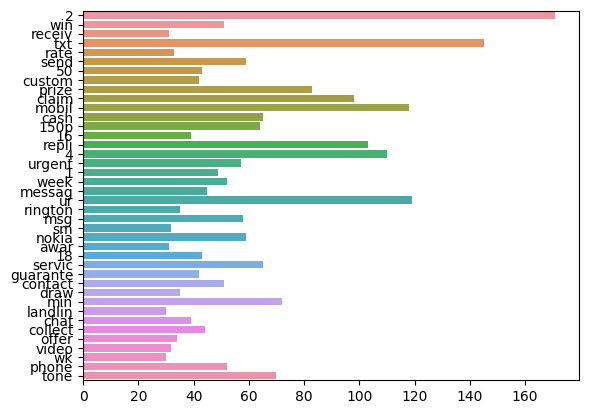

In [ ]:
sns.barplot(y=frequent_words[: , 0],x=frequent_words[: , 1].astype(float),)

**MODEL BUILDING**

Vectorization

>For this we will be using bag of words



In [ ]:
class Bag_of_words :
  def __init__(self) :
    self.arr = []
    self.dictionary = {}
    self.vec_2d = []
  def tokens(self,sentences) :
    for i in sentences :
      if len(i) != 0 :
        self.arr.extend(i.split(" "))
  def dictionary_creation(self) :
    for i in self.arr :
      if i not in self.dictionary.keys() :
        self.dictionary[i] = 1
      else :
        self.dictionary[i] += 1
    b = list(self.dictionary.keys())
    for i in b :
      if self.dictionary[i] < 2 :
        del self.dictionary[i]
  def vect_creation(self,sentences) :
    for i in sentences :
      vec = []
      for j in list(i.split(" ")) :
        if j in self.dictionary.keys() :
          vec.append(1)
        else :
          vec.append(0)
      self.vec_2d.append(vec)

  def vect_creation_(self,sentence) :
    ans = []
    l = list(sentence.split(" "))
    for i in l :
      if i in self.dictionary.keys() :
        ans.append(1)
      else :
        ans.append(0)
    return ans



  def padding(self,vec) :
    if len(vec) < 80 :
      return [0]*(80-len(vec))+vec
    return vec

  def bow(self,sentences) :
    self.tokens(sentences)
    self.dictionary_creation()
    self.vect_creation(sentences)
    vec = []
    for i in self.vec_2d :
      vec.append(self.padding(i))
    return vec

  def bow_(self,sentence) :
    vec = self.vect_creation_(sentence)
    vec = self.padding(vec)
    return vec






In [ ]:
def BOW(sentences) :
  words = []
  for i in sentences :
    if len(i) != 0 :
      words.extend(i.split(" "))

  word_frequency = {}

  for i in words :
    if i not in word_frequency.keys() :
      word_frequency[i] = 1
    else :
      word_frequency[i] += 1

  b = list(word_frequency.keys())
  for i in b :
    if word_frequency[i] < 2 :
      del word_frequency[i]

  vec_2d = []
  for i in sentences :
    vec = []
    for j in list(i.split()) :
      if j in word_frequency :
        vec.append(1)
      else :
        vec.append(0)
    vec_2d.append(vec)

  max_len_vec = 0
  for i in vec_2d :
    if len(i) > max_len_vec :
      max_len_vec = len(i)
  for i in range(len(vec_2d)) :
    if len(vec_2d[i]) < max_len_vec :
      vec_2d[i] = [0]*(max_len_vec-len(vec_2d[i]))+vec_2d[i]
  return vec_2d , word_frequency , max_len_vec


In [ ]:
vec_2d , word_frequency , max_len_vec = np.array(BOW(data_set['message'].tolist()))

<ipython-input-64-19eadc3e894a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vec_2d , word_frequency , max_len_vec = np.array(BOW(data_set['message'].tolist()))


In [ ]:
def custom_bow(word_frequency,sentence,max_len_vec) :
  vec = []
  for i in list(sentence.split(" ")):
    if i in word_frequency.keys() :
      vec.append(1)
    else :
      vec.append(0)
  if len(vec) < max_len_vec :
    vec = [0]*(max_len_vec-len(vec))+vec
  return [vec]


In [ ]:
#x = np.array(BOW(data_set['transformed_text'].tolist()))
x = vec_2d

In [ ]:
y = data_set['target'].tolist()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 123)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
print("Gaussian NB using BOW")
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred1))
print("Precession : ",precision_score(y_test,y_pred1))

Gaussian NB using BOW
Accuracy :  0.15625
Confusion Matrix
[[ 17 864]
 [  0 143]]
Precession :  0.1420059582919563


In [ ]:
print("Multinomial NB using BOW")
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred2))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred2))
print("Precession : ", precision_score(y_test,y_pred2))

Multinomial NB using BOW
Accuracy:  0.8466796875
Confusion Matrix
[[761 120]
 [ 37 106]]
Precession :  0.4690265486725664


In [ ]:
print("Bernoulli's NB using BOW")
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred3))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred3))
print("Precession : ",precision_score(y_test,y_pred3))

Bernoulli's NB using BOW
Accuracy:  0.783203125
Confusion Matrix
[[687 194]
 [ 28 115]]
Precession :  0.37216828478964403


TF-IDF Vectorization

In [ ]:
def ___build_tfidf_matrix(__documents):
    def __calculate_tf__(__term, __document):
        if len(__document) == 0:
            return 0
        return __document.count(__term) / len(__document)

    def __calculate_idf__(__term, __all_documents):
        __num_documents_with_term = sum(1 for doc in __all_documents if term in doc)
        return math.log(len(__all_documents) / (1 + __num_documents_with_term))

    unique_terms = set(__term for __doc in __documents for __term in __doc)
    document_term_matrix = []

    for document in __documents:
        tfidf_vector = []
        for term in unique_terms:
            tf = __calculate_tf__(term, document)
            idf = __calculate_idf__(term, __documents)
            tfidf = tf * idf
            tfidf_vector.append(tfidf)
        document_term_matrix.append(tfidf_vector)

    return document_term_matrix, unique_terms

In [ ]:
def __tf_idf_vectorize(unique_terms, document):
    def __calculate_tf__(__term, __document):
        if len(__document) == 0:
            return 0
        return __document.count(__term) / len(__document)

    def __calculate_idf__(__term, __all_documents):
        __num_documents_with_term = sum(1 for doc in __all_documents if term in doc)
        return math.log(len(__all_documents) / (1 + __num_documents_with_term))

    tfidf_vector = []
    __documents = data_set["transformed_text"].tolist()
    __documents.append(document)
    for term in unique_terms:
        tf = __calculate_tf__(term, document)
        idf = __calculate_idf__(term, __documents)
        tfidf = tf * idf
        tfidf_vector.append(tfidf)
    return tfidf_vector


In [ ]:
matrix, terms = ___build_tfidf_matrix(data_set["message"].tolist())

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(matrix,y,test_size=0.2,random_state = 123)

In [ ]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [ ]:
print("Gaussian NB using TFIDF")
gnb1.fit(x_train1,y_train1)
y_pred1 = gnb1.predict(x_test1)
print("Accuracy: ",accuracy_score(y_test1,y_pred1))
print("Confusion Matrix")
print(confusion_matrix(y_test1,y_pred1))
print("Precession : ",precision_score(y_test1,y_pred1))

Gaussian NB using TFIDF
Accuracy:  0.31640625
Confusion Matrix
[[181 700]
 [  0 143]]
Precession :  0.16963226571767498


In [ ]:
print("Mutinomial NB using TFIDF")
mnb1.fit(x_train1,y_train1)
y_pred1 = mnb1.predict(x_test1)
print("Accuracy: ",accuracy_score(y_test1,y_pred1))
print("Confusion Matrix")
print(confusion_matrix(y_test1,y_pred1))
print("Precession : ",precision_score(y_test1,y_pred1))

Mutinomial NB using TFIDF
Accuracy:  0.8603515625
Confusion Matrix
[[880   1]
 [142   1]]
Precession :  0.5


In [ ]:
print("Bernoulli's NB using TFIDF")
bnb1.fit(x_train1,y_train1)
y_pred1 = bnb1.predict(x_test1)
print("Accuracy: ",accuracy_score(y_test1,y_pred1))
print("Confusion Matrix")
print(confusion_matrix(y_test1,y_pred1))
print("Precession : ",precision_score(y_test1,y_pred1))

Bernoulli's NB using TFIDF
Accuracy:  0.96875
Confusion Matrix
[[867  14]
 [ 18 125]]
Precession :  0.8992805755395683



#